<a href="https://colab.research.google.com/github/RasikhTariq/hello-world/blob/main/Mutlicolinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

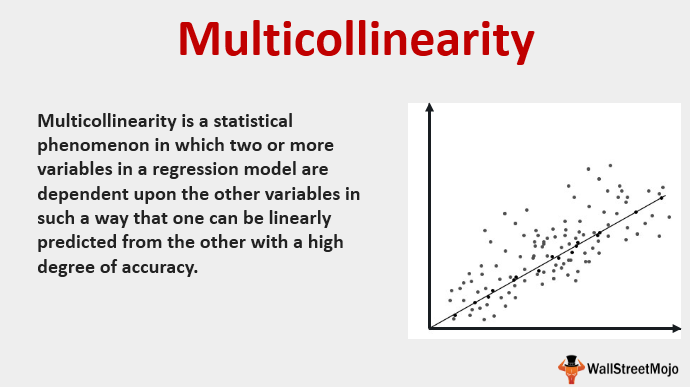

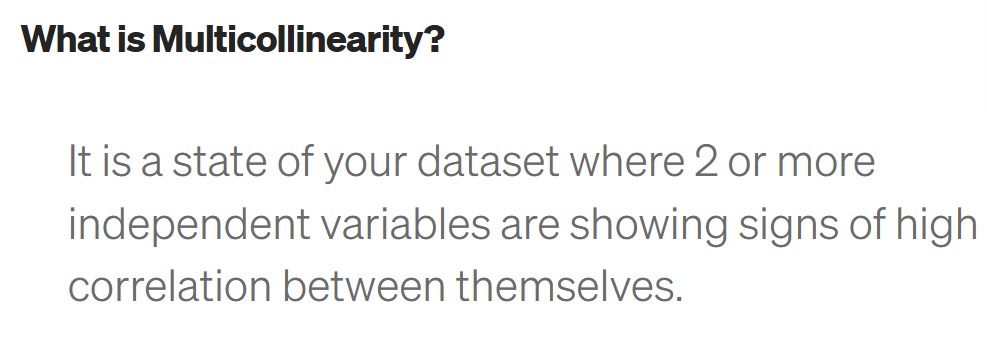

Ways to detect the multicolinearity.

1. Heat Maps.
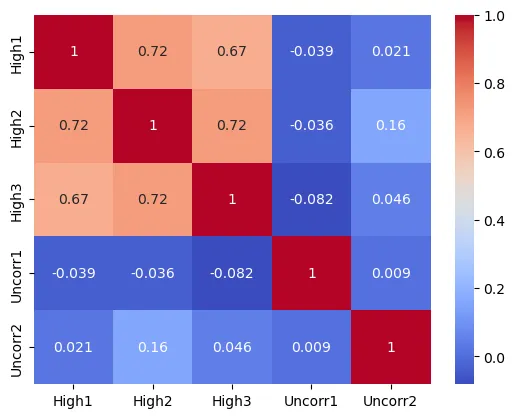
Sample heatmap plotted between 3 highly correlated and 2 non correlated features


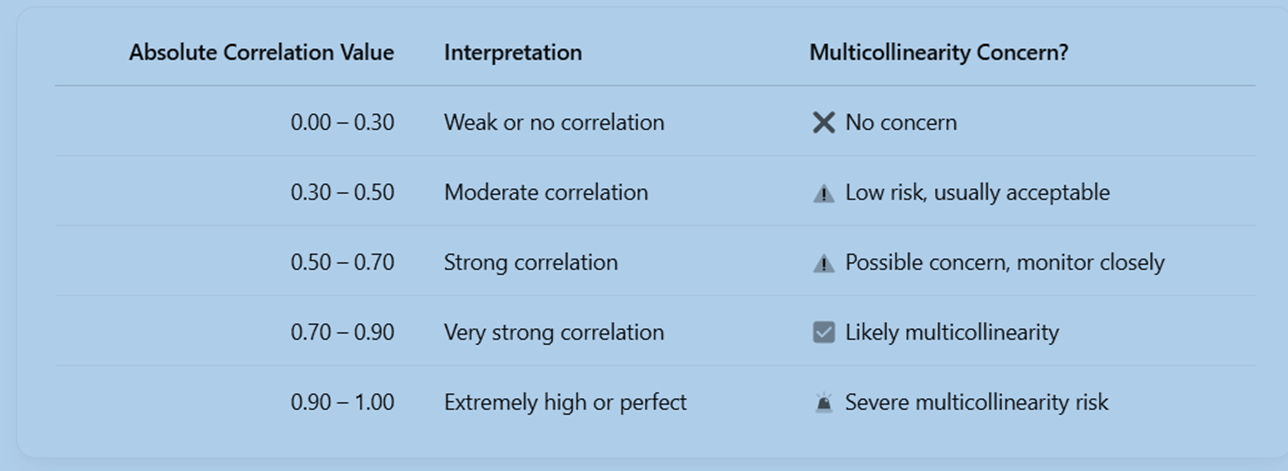

Scatter plots

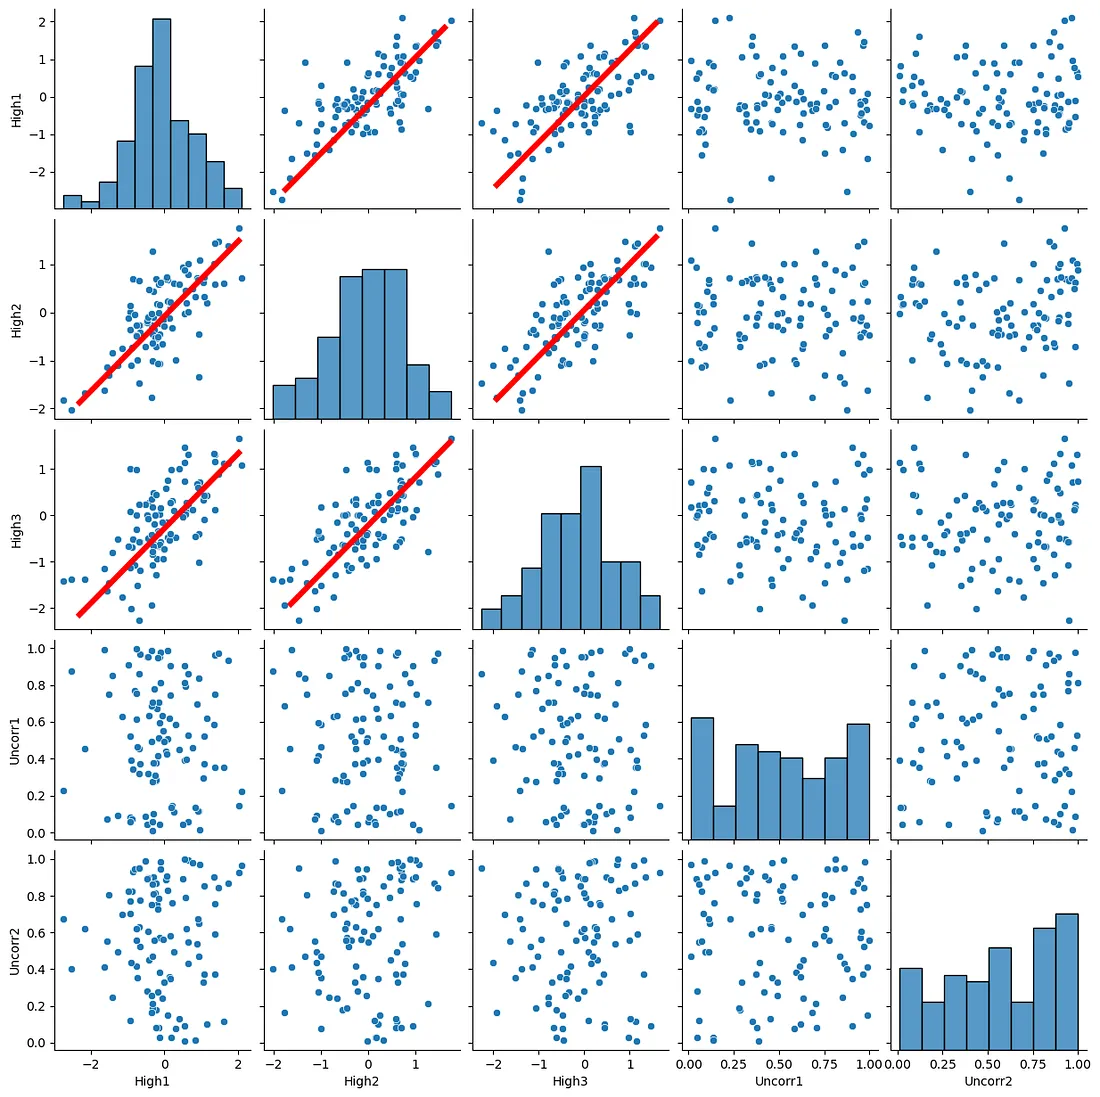

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load from public URL (or use sklearn.datasets.load_diabetes for regression)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Preview
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


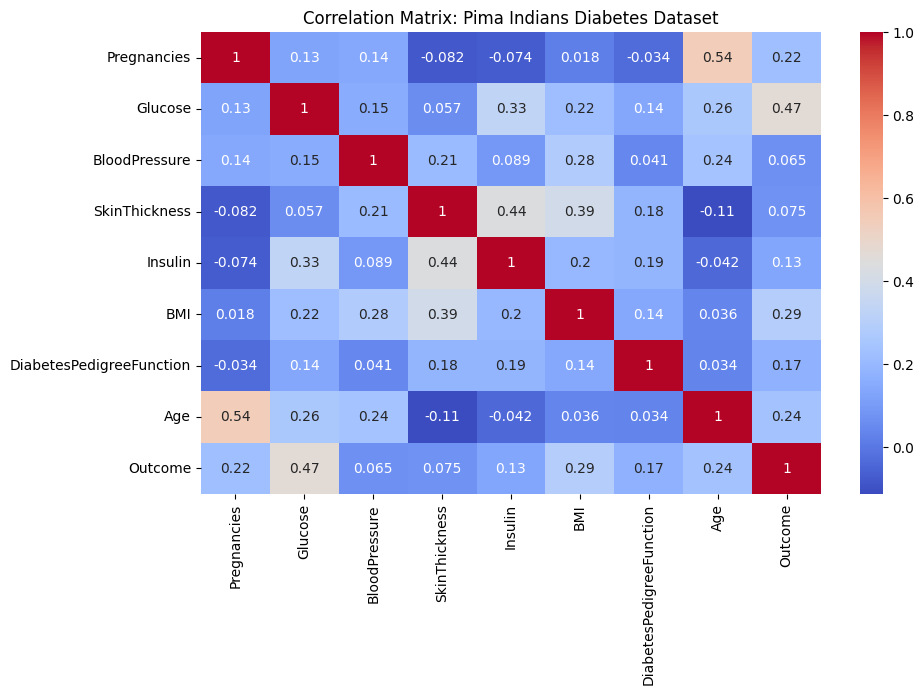

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix: Pima Indians Diabetes Dataset")
plt.show()


“If two features are highly correlated, they give the model the same information. This can confuse models like logistic regression, which try to assign different weights to each input. By using the correlation matrix, we can spot these redundancies and decide whether to remove one of the features.”



The Variance Inflation Factor (VIF) is a statistical measure used to detect multicollinearity in regression models. **VIF quantifies how much the variance of a regression coefficient is inflated due to linear correlation with other predictor variables.**

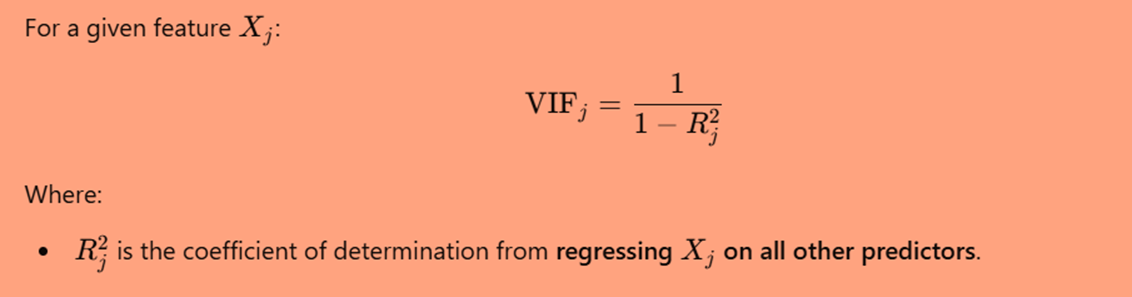

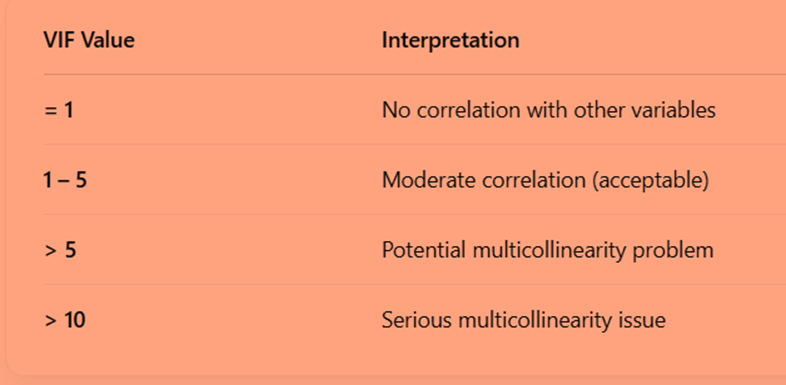

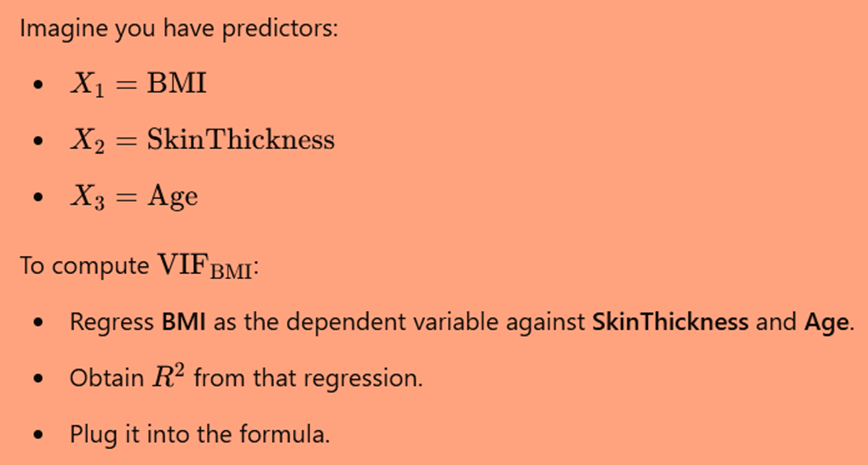

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=['Outcome'])
X = add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                    Feature        VIF
0                     const  35.039974
1               Pregnancies   1.430872
2                   Glucose   1.298961
3             BloodPressure   1.181863
4             SkinThickness   1.507432
5                   Insulin   1.427536
6                       BMI   1.297450
7  DiabetesPedigreeFunction   1.067090
8                       Age   1.588368


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df1 = pd.read_csv(url)
#https://www.kaggle.com/datasets/altavish/boston-housing-dataset
df1


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Medv: Median value of owner-occupied homes in $1000s (Target variable)


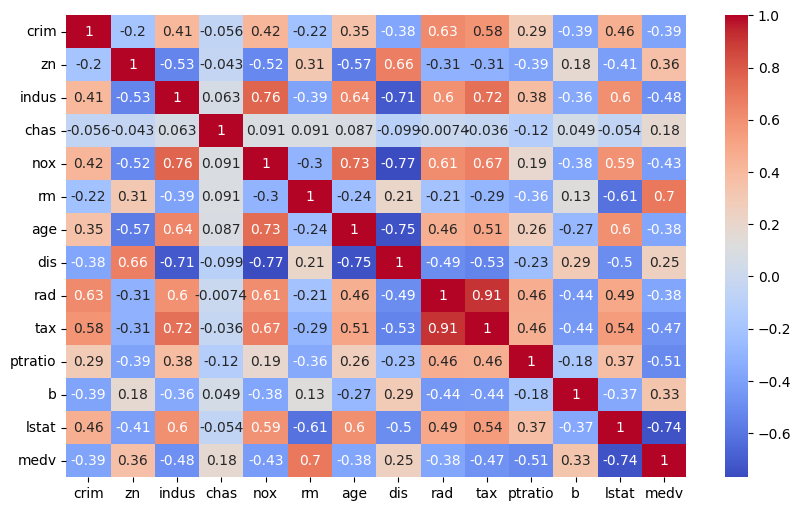

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df1.drop(columns=['medv'])
X = add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


    Feature         VIF
0     const  585.265238
1      crim    1.792192
2        zn    2.298758
3     indus    3.991596
4      chas    1.073995
5       nox    4.393720
6        rm    1.933744
7       age    3.100826
8       dis    3.955945
9       rad    7.484496
10      tax    9.008554
11  ptratio    1.799084
12        b    1.348521
13    lstat    2.941491
